In [1]:
import matplotlib.pyplot as plt
import timeit
import math

Constant Variable

In [2]:
SEED = 0.1315 

## Von Neumann

In [3]:
def rng_VonNeumann(graine):
    number = str(graine*graine)
    if len(number)<=4:
        return(int(number))
    if len(number)==5:
        return(int(number[1:3]))
    if len(number)==6:
        return(int(number[1:4]))
    if len(number)==7:
        return(int(number[2:5]))
    if len(number)==8:
        return(int(number[2:5]))
        

In [4]:
def Unif_VonNeumann(Sn):
    graine = int(Sn*10000)
    return((rng_VonNeumann(graine))/10000)

In [5]:
Unif_VonNeumann(0.1315)

0.0292

(array([8.329e+03, 4.200e+02, 4.180e+02, 0.000e+00, 1.000e+00, 4.150e+02,
        1.000e+00, 1.000e+00, 0.000e+00, 4.160e+02]),
 array([0.0012 , 0.09133, 0.18146, 0.27159, 0.36172, 0.45185, 0.54198,
        0.63211, 0.72224, 0.81237, 0.9025 ]),
 <a list of 10 Patch objects>)

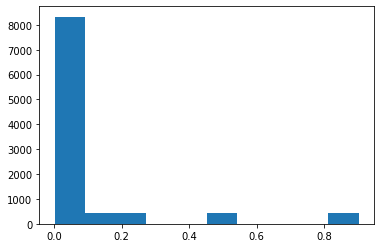

In [6]:
n = 10000
Sn = SEED
S = [Sn]
for i in range(n):
    Sn = Unif_VonNeumann(Sn)
    S.append(Sn)
    #print(Sn)
plt.hist(S)

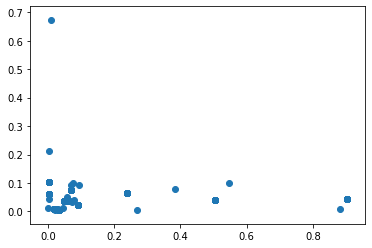

In [7]:
n = 10000
Sn = SEED
x = []
y = []
for i in range(n):
    Sn = Unif_VonNeumann(Sn)
    x.append(Sn)
    Sn = Unif_VonNeumann(Sn)
    y.append(Sn)
plt.scatter(x,y)

## Congruence Generator

In [8]:
def generator_congruence(graine,a,b,m):
    return ((a*graine+b)%m)

def Unif_generator_congruence(Sn,a,b,m):
    graine = int(Sn*m)
    return(generator_congruence(graine,a,b,m)/m)

## RANDU

In [9]:
def Unif_RANDU(Sn):
    return Unif_generator_congruence(Sn,65539,0,pow(2,31))

(array([101.,  95., 117.,  96., 126.,  90.,  81.,  91.,  98., 106.]),
 array([1.54314097e-04, 1.00048714e-01, 1.99943115e-01, 2.99837515e-01,
        3.99731915e-01, 4.99626315e-01, 5.99520715e-01, 6.99415116e-01,
        7.99309516e-01, 8.99203916e-01, 9.99098316e-01]),
 <a list of 10 Patch objects>)

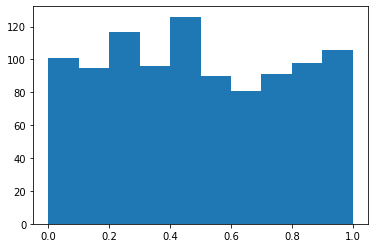

In [10]:
n = 1000
Sn = SEED
S = [Sn]
for i in range(n):
    Sn = Unif_RANDU(Sn)
    S.append(Sn)
    #print(Sn)
plt.hist(S)

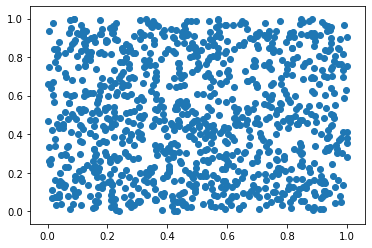

In [11]:
n = 1000
Sn = SEED
x = []
y = []
for i in range(n):
    Sn = Unif_RANDU(Sn)
    x.append(Sn)
    Sn = Unif_RANDU(Sn)
    y.append(Sn)
plt.scatter(x,y)

## Standard Minimal

In [12]:
def Unif_StandardMininmal(Sn):
    return Unif_generator_congruence(Sn,16807,0,pow(2,31)-1)

(array([ 9921., 10104., 10151., 10039.,  9899.,  9948.,  9888., 10089.,
        10022.,  9940.]),
 array([1.47242099e-06, 1.00000968e-01, 2.00000463e-01, 2.99999959e-01,
        3.99999454e-01, 4.99998949e-01, 5.99998445e-01, 6.99997940e-01,
        7.99997436e-01, 8.99996931e-01, 9.99996427e-01]),
 <a list of 10 Patch objects>)

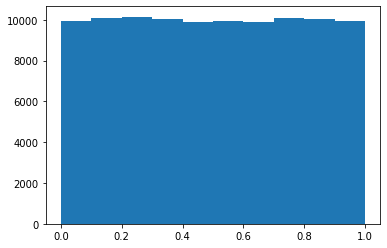

In [13]:
n = 100000
Sn = 0.1315
S = [SEED]
for i in range(n):
    Sn = Unif_StandardMininmal(Sn)
    S.append(Sn)
    #print(Sn)
plt.hist(S)

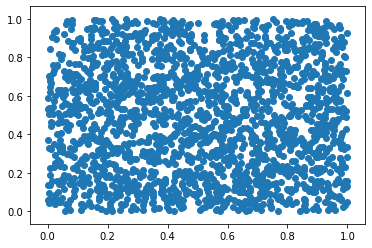

In [14]:
n = 2000
Sn = SEED
x = []
y = []
for i in range(n):
    Sn = Unif_StandardMininmal(Sn)
    x.append(Sn)
    Sn = Unif_StandardMininmal(Sn)
    y.append(Sn)
plt.scatter(x,y)

## Mersenne Twister (19937)

Algorithm is based on Wikipedia Algorithm https://en.wikipedia.org/wiki/Mersenne_Twister

In [31]:
class MT19937 :
    
    def __init__(self):
        self.w, self.n, self.m, self.r = 32, 624, 397, 31
        self.a = 0x9908B0DF
        self.u, self.d = 11, 0xFFFFFFFF
        self.s, self.b = 7, 0x9D2C5680
        self.t, self.c = 15, 0xEFC60000
        self.l = 18
        self.f = 1812433253
        
        self.upper_mask = pow(2,self.w) - pow(2,self.r)
        self.lower_mask = pow(2,self.w) - 1 - self.upper_mask

        self.MT = [0 for i in range(n)]
        self.index = n

    def seed(self,seed):
        self.MT[0] = seed
        for i in range(1,n):
            temp = self.f * (self.MT[i-1] ^ (self.MT[i-1] >> (self.w-2))) + i
            self.MT[i] = temp & 0xFFFFFFFF

    def extract_number(self):
        if self.index >= n:
            self.twist()
            self.index = 0

        self.y = self.MT[self.index]
        self.y = self.y ^ ((self.y >> self.u) & self.d)
        self.y = self.y ^ ((self.y << self.t) & self.c)
        self.y = self.y ^ ((self.y << self.s) & self.b)
        self.y = self.y ^ (self.y >> self.l)

        self.index += 1
        return self.y & 0xFFFFFFFF

    def twist(self):
        for i in range(n):
            x = (self.MT[i] & self.upper_mask) + (self.MT[(i+1) % n] & self.lower_mask)
            xA = x >> 1
            if (x%2 != 0):
                xA = xA ^ self.a
            self.MT[i] = self.MT[(i + self.m)%n] ^ xA
            
    def uniform(self,n=1):
        if n==1:
            return self.extract_number()/pow(2,32)
        res = []
        for i in range(n):
            res.append(self.extract_number()/pow(2,32))
        return res
        

In [45]:
MT = MT19937()
MT.seed(321321)

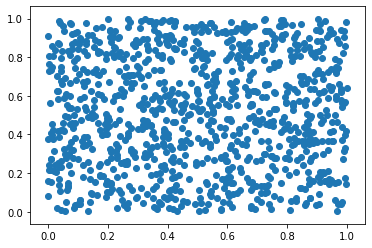

In [46]:
x=[]
y=[]
for i in range(1000):
    x.append(MT.uniform())
    y.append(MT.uniform())
plt.scatter(x,y)